In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Step 1: Preprocess the data and split it into training and validation sets
data = pd.read_csv("dataset/dataset_membrane_.csv")
# Split the dataset into features (X) and target (y)
X = data[['SW', 'MWCO', 'CA', 'ZP']].values
y = data['Rejection'].values.reshape(-1, 1)  # Reshape to make it a column vector

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Step 2: Define the Linear CNN model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(4, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

In [4]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Absolute Error for metrics


In [5]:
# Step 3: Train the model
history = model.fit(
    X_train.reshape(-1, 4, 1), y_train,
    validation_data=(X_val.reshape(-1, 4, 1), y_val),
    epochs=2000,
    batch_size=64,
    verbose=1
)

1 - val_mae: 0.2693
Epoch 1853/2000
66/66 [==============================] - 0s 2ms/step - loss: 0.1003 - mae: 0.2705 - val_loss: 0.0990 - val_mae: 0.2677
Epoch 1854/2000
66/66 [==============================] - 0s 1ms/step - loss: 0.1003 - mae: 0.2702 - val_loss: 0.0991 - val_mae: 0.2674
Epoch 1855/2000
66/66 [==============================] - 0s 1ms/step - loss: 0.1002 - mae: 0.2700 - val_loss: 0.0989 - val_mae: 0.2681
Epoch 1856/2000
66/66 [==============================] - 0s 1ms/step - loss: 0.1002 - mae: 0.2699 - val_loss: 0.0990 - val_mae: 0.2671
Epoch 1857/2000
66/66 [==============================] - 0s 1ms/step - loss: 0.1002 - mae: 0.2696 - val_loss: 0.0992 - val_mae: 0.2682
Epoch 1858/2000
66/66 [==============================] - 0s 1ms/step - loss: 0.1002 - mae: 0.2699 - val_loss: 0.0989 - val_mae: 0.2679
Epoch 1859/2000
66/66 [==============================] - 0s 2ms/step - loss: 0.1002 - mae: 0.2699 - val_loss: 0.0992 - val_mae: 0.2658
Epoch 1860/2000
66/66 [============

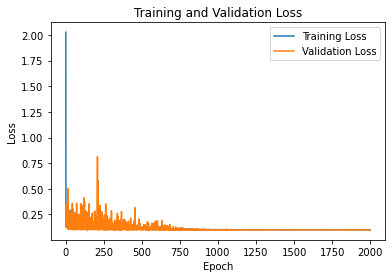

In [6]:
# Step 4: Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [7]:
# Step 5: Save predictions and ground truth as CSV files
y_train_pred = model.predict(X_train.reshape(-1, 4, 1))
y_val_pred = model.predict(X_val.reshape(-1, 4, 1))

train_results = pd.DataFrame({'Ground Truth': y_train.flatten(), 'Prediction': y_train_pred.flatten()})
val_results = pd.DataFrame({'Ground Truth': y_val.flatten(), 'Prediction': y_val_pred.flatten()})

train_results.to_csv('CNNtrain_predictionsRejection.csv', index=False)
val_results.to_csv('CNNRejection.csv', index=False)
val_results.to_excel('CNNRejection.xlsx', index=False)


33/33 [==============================] - 0s 749us/step


In [8]:
# Step 6: Evaluate performance
train_loss, train_mae = model.evaluate(X_train.reshape(-1, 4, 1), y_train, verbose=0)
val_loss, val_mae = model.evaluate(X_val.reshape(-1, 4, 1), y_val, verbose=0)

print("Training Loss:", train_loss)
print("Training MAE:", train_mae)
print("Validation Loss:", val_loss)
print("Validation MAE:", val_mae)

Training Loss: 0.10021371394395828
Training MAE: 0.2710669934749603
Validation Loss: 0.09918039292097092
Validation MAE: 0.2686629295349121
